In [1]:
import sys
sys.path.append('..')

import numpy as np
import torch
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms

from models.axial_unet import AxialUnet
from datasets.ice import Ice

import matplotlib.pyplot as plt

import os

ImportError: cannot import name 'AxialUnet' from 'models.axial_unet' (../models/axial_unet/__init__.py)

In [ ]:
data_dir = '../data'
img_scale = 0.35
img_crop = 320

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

test_set = Ice(os.path.join(data_dir, 'imgs'), os.path.join(data_dir, 'masks'),
                  os.path.join(data_dir, 'txt_files'), 'test', img_scale, img_crop)

net = AxialUnet(channels=3, n_classes=3, embedding_dims=20, sine_pos=False)

net.to(device=device)
net.load_state_dict(torch.load('../checkpoints/epoch20.pth', map_location=device))

In [3]:
img = test_set[0]['image'].unsqueeze(0).to(device=device, dtype=torch.float32)
img.shape

torch.Size([320, 320, 3]) torch.Size([1, 320, 320])


torch.Size([1, 320, 320, 3])

In [4]:
mask = test_set[0]['mask'].unsqueeze(0).to(device=device, dtype=torch.float32)
mask.shape

torch.Size([320, 320, 3]) torch.Size([1, 320, 320])


torch.Size([1, 1, 320, 320])

In [5]:
torch.unique(mask)

tensor([0., 1., 2.], device='cuda:0')

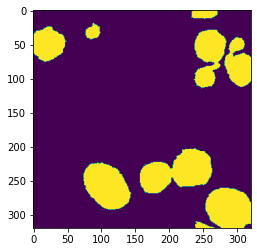

In [27]:
plt.imshow(mask.squeeze(0).permute(1,2,0).detach().cpu().numpy()[:,:,2]);

In [9]:
target = torch.argmax(mask.to(dtype=torch.long), dim=1)
target.shape

torch.Size([1, 320, 320])

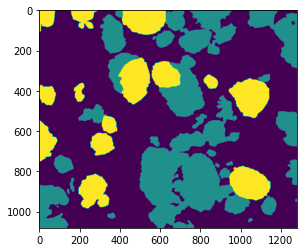

In [6]:
mask = plt.imread(f'../data/labels/img_{37}.tif')
plt.imshow(mask[:,:,0])

(1081, 1281)
[0 1 2]


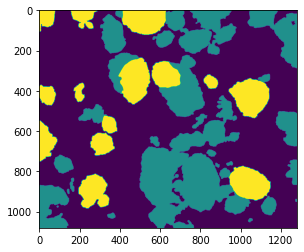

In [8]:
mask_new = np.zeros_like(mask[:,:,0])
mask_new[(mask[:,:,0] == 128)] = 1
mask_new[(mask[:,:,0] == 255)] = 2
print(mask_new.shape)
print(np.unique(mask_new))
plt.imshow(mask_new)

In [14]:
n_class = 10
preds = torch.randn(4, n_class, 24, 24)
labels = torch.empty(4, 24, 24, dtype=torch.long).random_(n_class)

print(preds.shape)
print(labels.shape)

torch.Size([4, 10, 24, 24])
torch.Size([4, 24, 24])


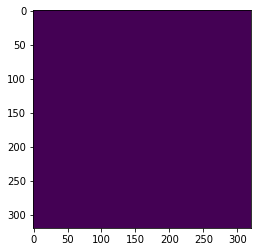

In [10]:
plt.imshow(target.squeeze(0).detach().cpu().numpy());

In [28]:
net.eval()
output = net(img)
probs = F.softmax(output, dim=1)

/home/dsola/anaconda3/envs/PGA-Net/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


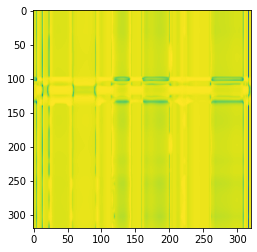

In [31]:
plt.imshow(probs.squeeze(0).permute(1,2,0).detach().cpu().numpy()[:,:,0]);